# PitchF/x Wrangle and Plot

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

```<video controls src="http://www.powerchalk.com/uploads/mp4s/110_F60BB484-0EE0-D13E-2F29-40E05E4C3518.mp4" />```


In [ ]:
name = input("Please enter your name:")

In [ ]:
print("Hello", name)
print("Hello Bob")

import ipywidgets as widgets
dropdown = widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

def handle_dd_change(change):
    print(change)
    
dropdown.observe(handle_dd_change)
display("Hitter", dropdown)

In [ ]:
caption = widgets.Label(value='The values of range1 and range2 are synchronized')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

In [19]:
print("Slider", slider.value)
print("Dropdown", dropdown.value)

Slider 1
Dropdown 3


In [1]:
import requests # apache http library
import xml.etree.ElementTree as ET # XML parsing 
import os # file and system level 

import pandas as pd  # dataframes, structures, analysis 
import numpy as np   # used by pandas

#enable inline notebook plotting 
%matplotlib inline  

'''matplotlib is a Python plotting library, inspired by MATLAB, meaning that the terms used 
(Axis, Figure, Plots) will be similar to those used in MATLAB.
It can be used both within a Python system (via the object-oriented API) 
but also in more convenient form in Jupyter and IPython notebooks via the Pyplot interface.'''

from termcolor import colored  # colored output using print
print("Hello world.")
print(colored("Hello back.", "red"))

Hello world.
Hello back.


### Pull Players into Dictionary

In [2]:
# url of players feed 
url = 'https://gd2.mlb.com/components/game/mlb/year_2014/month_06/day_18/gid_2014_06_18_colmlb_lanmlb_1/players.xml'
#url = "https://gd2.mlb.com/components/game/mlb/year_2018/month_08/day_12/gid_2018_08_12_lanmlb_colmlb_1/players.xml"
resp = requests.get(url) 
print(colored(resp,"blue"))
xmlfile = "myplayers.xml"
with open(xmlfile, 'wb') as f: 
    f.write(resp.content)
statinfo = os.stat(xmlfile)  
print(colored(xmlfile + ": " + str(round(statinfo.st_size/1024)) + " KB\n", "blue"))

# Pull players into tree structure <game><team><player><player></team><team><player><player></team></game>
tree = ET.parse(xmlfile)
game = tree.getroot()
teams = game.findall("./team")
playerDict = {}

### Verify Player Dictionary
for team in teams:
    print(team.attrib.get("name"))
    players = team.findall("./player")
    for player in players:
        print("   ", player.attrib.get("id"), player.attrib.get("first"), player.attrib.get("last"))
        playerDict[ player.attrib.get("id") ] = player.attrib.get("first") + " " + player.attrib.get("last") 


<Response [200]>
myplayers.xml: 19 KB

Colorado Rockies
    115629 LaTroy Hawkins
    150212 Michael Cuddyer
    279571 Matt Belisle
    407822 Jorge De La Rosa
    408047 Justin Morneau
    434665 Nick Masset
    453064 Troy Tulowitzki
    453211 Drew Stubbs
    453568 Charlie Blackmon
    455119 Chris Martin
    457429 Boone Logan
    462985 Franklin Morales
    468504 Jhoulys Chacin
    471865 Carlos Gonzalez
    474463 Brett Anderson
    488681 Brandon Barnes
    493603 Adam Ottavino
    501647 Wilin Rosario
    502374 Michael McKenry
    518586 Charlie Culberson
    518934 DJ LeMahieu
    543022 Tyler Chatwood
    543475 Jordan Lyles
    548357 Christian Bergman
    554431 Tyler Matzek
    571448 Nolan Arenado
    571521 Rex Brothers
    572253 Ryan Wheeler
    572750 Eddie Butler
    572816 Corey Dickerson
    592454 Tommy Kahnle
    592621 Kyle Parker
    592710 Josh Rutledge
Los Angeles Dodgers
    124604 Jamey Wright
    277417 Josh Beckett
    346874 Juan Uribe
    408210 Cho

In [3]:
playerDict["624577"]

'Yasiel Puig'

### Clayton Kershaw No-Hitter - June 18, 2014, Dodgers vs. Rockies, 8-0 
Jun 18, 2014 - Kershaw no-hit the Rockies while striking out 15 and not walking a single batter. There have been 283 no-hitters in baseball history, but Kershaw is the only one to have at least 15 strikeouts and no walks. Only one other pitcher has even thrown a no-hitter with at least 15 strikeouts. ... He needed only 107 pitches.

#### Get Innings_All Data

In [4]:
url = 'https://gd2.mlb.com/components/game/mlb/year_2014/month_06/day_18/gid_2014_06_18_colmlb_lanmlb_1/inning/inning_all.xml'
resp = requests.get(url) 
print(colored(resp,"blue"))
xmlfile = "mygame.xml"
with open(xmlfile, 'wb') as f: 
    f.write(resp.content)
statinfo = os.stat(xmlfile)  
print(colored(xmlfile + ": " + str(round(statinfo.st_size/1024)) + " KB\n", "blue"))

# Pull XML into tree structure
tree = ET.parse(xmlfile)
root = tree.getroot()
print("Tree.root.tag = " + root.tag)

# Unpack the game to find innings
for child in root:
    print (child.tag, child.attrib.get("num"))
    for frame in child:
        print ("   ", frame.tag, frame.attrib) # type(frame))

<Response [200]>
mygame.xml: 182 KB

Tree.root.tag = game
inning 1
    top {}
    bottom {}
inning 2
    top {}
    bottom {}
inning 3
    top {}
    bottom {}
inning 4
    top {}
    bottom {}
inning 5
    top {}
    bottom {}
inning 6
    top {}
    bottom {}
inning 7
    top {}
    bottom {}
inning 8
    top {}
    bottom {}
inning 9
    top {}


### Walk through innings detail via Tree Element

In [8]:
frames = ["top", "bottom"]
pitchDictionary = { "FA":"fastball", "FF":"4-seam fb", "FT": "2-seam fb", "FC": "fb-cutter", "":"unknown", None: "none",
                    "FS":"fb-splitter", "SL":"slider", "CH":"changeup","CU":"curveball","KC":"knuckle-curve",
                    "KN":"knuckleball","EP":"eephus", "UN":"unidentified", "PO":"pitchout", "SI":"sinker", "SF":"split-finger"
                    }
totalPitchCount = 0

innings = root.findall("./inning")
for inning in innings:
    for i in range(len(frames)):
        color = "green" if i == 0 else "yellow" #show top of inning in green; bottom in yellow
        print(colored("\nInning " + inning.attrib.get("num") + " (" + frames[i] + ")", color, attrs=['reverse']))
        fr = inning.find(frames[i])
        if fr is not None:
            for ab in fr.iter('atbat'):
                #battername = ab.get('batter')
                battername = playerDict[ab.get('batter')]
                abPitchCount = 0
                print (colored("   " + battername, color, attrs=['bold']))
                
                pitches = ab.findall("pitch")
                #print(pitches)
                for p in pitches:
                    abPitchCount = abPitchCount + 1
                    totalPitchCount = totalPitchCount + 1
                    verbosePitch = pitchDictionary[p.get("pitch_type")]
                    print(colored("      pitch " + str(abPitchCount) + ": " + verbosePitch, color))
                print("      " + colored( ab.attrib.get("event"), color, attrs=['underline']))
print("Total pitches: " + str(totalPitchCount))


Inning 1 (top)
   Corey Dickerson
      pitch 1: 4-seam fb
      pitch 2: 4-seam fb
      pitch 3: 4-seam fb
      pitch 4: slider
      pitch 5: 4-seam fb
      pitch 6: slider
      Strikeout
   Brandon Barnes
      pitch 1: 4-seam fb
      Flyout
   Troy Tulowitzki
      pitch 1: 4-seam fb
      pitch 2: slider
      pitch 3: curveball
      pitch 4: slider
      pitch 5: 4-seam fb
      Groundout

Inning 1 (bottom)
   Dee Gordon
      pitch 1: 4-seam fb
      pitch 2: 4-seam fb
      pitch 3: 4-seam fb
      pitch 4: 4-seam fb
      pitch 5: 4-seam fb
      pitch 6: 4-seam fb
      pitch 7: 4-seam fb
      pitch 8: 4-seam fb
      Walk
   Hanley Ramirez
      pitch 1: 4-seam fb
      pitch 2: fb-cutter
      pitch 3: 4-seam fb
      pitch 4: 4-seam fb
      pitch 5: 4-seam fb
      pitch 6: fb-splitter
      Walk
   Yasiel Puig
      pitch 1: 4-seam fb
      pitch 2: fb-splitter
      pitch 3: fb-cutter
      pitch 4: 4-seam fb
      Sac Fly
   Adrian Gonzalez
      pitch 1: 4-sea

### Load Inning Detail in to Dataframe
#### gameday pitch fields definitions: https://fastballs.wordpress.com/2007/08/02/glossary-of-the-gameday-pitch-fields/

In [68]:
frames = ["top", "bottom"]
pitchDF = pd.DataFrame(columns = ['pitchIdx', 'inning', 'frame', 'ab', 'abIdx', 'batter', 'stand', 'speed', 
                                       'pitchtype', 'px', 'pz', 'szTop', 'szBottom', 'des'], dtype=object)

totalPitchCount = 0
topPitchCount = 0 # pitches thrown by home team
bottomPitchCount = 0 # pitches thrown by visiting team

for inning in innings:
    for i in range(len(frames)):
        fr = inning.find(frames[i])
        if fr is not None:
            for ab in fr.iter('atbat'):
                #print(ab)
                battername = playerDict[ab.get('batter')]
                standside = ab.get('stand')
                abIdx = ab.get('num')
                abPitchCount = 0
                pitches = ab.findall("pitch")
                for pitch in pitches:
                    if pitch.attrib.get("start_speed") is None:
                        speed == 0
                    else:
                        speed = float(pitch.attrib.get("start_speed"))
                    pxFloat = 0.0 if pitch.attrib.get("px") == None else float('{0:.2f}'.format(float(pitch.attrib.get("px"))))
                    pzFloat = 0.0 if pitch.attrib.get("pz") == None else float('{0:.2f}'.format(float(pitch.attrib.get("pz"))))
                    szTop = 0.0 if pitch.attrib.get("sz_top") == None else float('{0:.2f}'.format(float(pitch.attrib.get("sz_top"))))
                    szBot = 0.0 if pitch.attrib.get("sz_bot") == None else float('{0:.2f}'.format(float(pitch.attrib.get("sz_bot"))))
                    print("pitch " + str(totalPitchCount) + " speed:" + str(pitch.attrib.get("start_speed")) + " frame:" + frames[i])
                    abPitchCount = abPitchCount + 1
                    totalPitchCount = totalPitchCount + 1
                    if frames[i]=='top':
                        topPitchCount = topPitchCount + 1
                    else:
                        bottomPitchCount = bottomPitchCount + 1
                    inn = inning.attrib.get("num")
                    verbosePitch = pitchDictionary[pitch.get("pitch_type")]
                    desPitch = pitch.get("des")
                    
                    #add row to dataframe
                    pitchDF.loc[totalPitchCount] = [float(totalPitchCount), inn, frames[i], abIdx, abPitchCount, battername, standside, speed,
                                               verbosePitch, pxFloat, pzFloat, szTop, szBot, desPitch]

print( str(totalPitchCount) + " pitches cataloged. Top: " + str(topPitchCount) + ". Bottom: " + str(bottomPitchCount) + ".")



pitch 0 speed:93.3 frame:top
pitch 1 speed:93.3 frame:top
pitch 2 speed:94.6 frame:top
pitch 3 speed:90.5 frame:top
pitch 4 speed:93.8 frame:top
pitch 5 speed:85.0 frame:top
pitch 6 speed:93.4 frame:top
pitch 7 speed:94.4 frame:top
pitch 8 speed:88.0 frame:top
pitch 9 speed:72.4 frame:top
pitch 10 speed:87.2 frame:top
pitch 11 speed:93.8 frame:top
pitch 12 speed:90.1 frame:bottom
pitch 13 speed:90.8 frame:bottom
pitch 14 speed:90.5 frame:bottom
pitch 15 speed:91.8 frame:bottom
pitch 16 speed:91.2 frame:bottom
pitch 17 speed:92.4 frame:bottom
pitch 18 speed:92.6 frame:bottom
pitch 19 speed:92.9 frame:bottom
pitch 20 speed:91.7 frame:bottom
pitch 21 speed:87.4 frame:bottom
pitch 22 speed:92.3 frame:bottom
pitch 23 speed:92.4 frame:bottom
pitch 24 speed:92.5 frame:bottom
pitch 25 speed:84.5 frame:bottom
pitch 26 speed:91.4 frame:bottom
pitch 27 speed:83.3 frame:bottom
pitch 28 speed:88.8 frame:bottom
pitch 29 speed:93.7 frame:bottom
pitch 30 speed:93.3 frame:bottom
pitch 31 speed:93.2 fra

pitch 256 speed:86.5 frame:top
257 pitches cataloged. Top: 107. Bottom: 150.


### Verify Pitch Data Frame

In [55]:
pitchDF.head(25)

,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des
idx,,,,,,,,,,,,,,
1,1,1,top,1,1,Corey Dickerson,L,93.3,4-seam fb,-0.52,1.86,3.40,1.51,Foul
2,2,1,top,1,2,Corey Dickerson,L,93.3,4-seam fb,-0.37,2.75,3.40,1.51,Swinging Strike
3,3,1,top,1,3,Corey Dickerson,L,94.6,4-seam fb,-1.67,1.33,3.66,1.71,Ball
4,4,1,top,1,4,Corey Dickerson,L,90.5,slider,-2.00,0.36,3.53,1.58,Ball
5,5,1,top,1,5,Corey Dickerson,L,93.8,4-seam fb,-0.26,3.47,3.40,1.51,Foul
6,6,1,top,1,6,Corey Dickerson,L,85.0,slider,-0.28,3.33,3.48,1.61,Called Strike
7,7,1,top,2,1,Brandon Barnes,R,93.4,4-seam fb,0.05,2.59,3.53,1.60,"In play, out(s)"
8,8,1,top,3,1,Troy Tulowitzki,R,94.4,4-seam fb,0.03,1.09,3.64,1.59,Ball
9,9,1,top,3,2,Troy Tulowitzki,R,88.0,slider,-1.39,0.61,3.58,1.71,Swinging Strike


In [48]:
#pitchDF.tail(3)
pitchDF.dtypes
pitchDF.columns
#pitchDF.describe()

Index(['pitchIdx', 'inning', 'frame', 'ab', 'abIdx', 'batter', 'stand',
       'speed', 'pitchtype', 'px', 'pz', 'szTop', 'szBottom', 'des'],
      dtype='object')

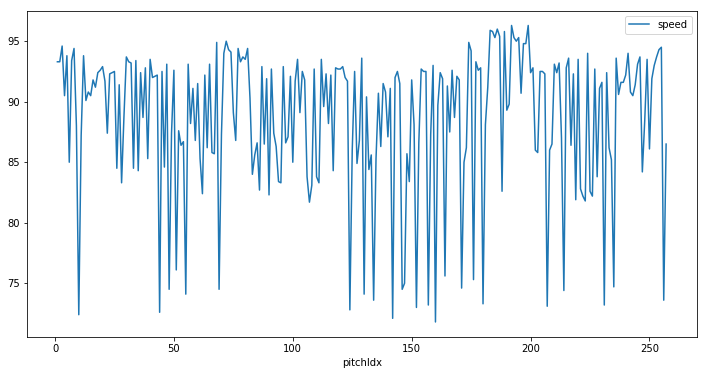

In [56]:
lines = pitchDF.plot.line(x='pitchIdx', y='speed', figsize=[12,6])
#lines = pitchDF.loc[pitchDF['frame']=='top'].plot.line(x='pitchIdx', y='speed', figsize=[12,6])

In [70]:
pitchDF['pitchIdx'] = pitchDF['pitchIdx'].astype('int')
pitchDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 1 to 257
Data columns (total 14 columns):
pitchIdx     257 non-null int32
inning       257 non-null object
frame        257 non-null object
ab           257 non-null object
abIdx        257 non-null object
batter       257 non-null object
stand        257 non-null object
speed        257 non-null float64
pitchtype    257 non-null object
px           257 non-null float64
pz           257 non-null float64
szTop        257 non-null float64
szBottom     257 non-null float64
des          257 non-null object
dtypes: float64(5), int32(1), object(8)
memory usage: 21.1+ KB


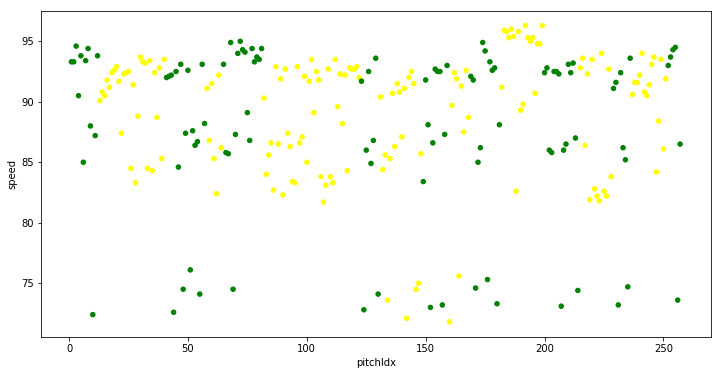

In [71]:
color= ['green' if f=='top' else 'yellow' for f in pitchDF['frame'].tolist()]
pitchDF.index.rename('idx', inplace=True)
#pitchDF['pitchIdx'].astype(float)
pitchDF.dtypes
pitchDF.plot(kind='scatter',x='pitchIdx', y='speed', color=color,  figsize=[12,6])

### Select operations from the Dataframe
#### Range

In [21]:
pitchDF[2:8]

,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des
3,3,1,top,1,3,Corey Dickerson,L,94.6,4-seam fb,-1.67,1.33,3.66,1.71,Ball
4,4,1,top,1,4,Corey Dickerson,L,90.5,slider,-2.00,0.36,3.53,1.58,Ball
5,5,1,top,1,5,Corey Dickerson,L,93.8,4-seam fb,-0.26,3.47,3.40,1.51,Foul
6,6,1,top,1,6,Corey Dickerson,L,85.0,slider,-0.28,3.33,3.48,1.61,Called Strike
7,7,1,top,2,1,Brandon Barnes,R,93.4,4-seam fb,0.05,2.59,3.53,1.60,"In play, out(s)"
8,8,1,top,3,1,Troy Tulowitzki,R,94.4,4-seam fb,0.03,1.09,3.64,1.59,Ball


#### One AtBat

In [59]:
pitchDF.loc[pitchDF['ab']=='10']
#pitchDF.loc[pitchDF['ab']=='12']

,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des
idx,,,,,,,,,,,,,,
41,41,2,top,10,1,Wilin Rosario,R,92.0,4-seam fb,0.03,3.89,3.37,1.6,Ball
42,42,2,top,10,2,Wilin Rosario,R,92.1,4-seam fb,-0.34,3.38,3.37,1.6,Foul
43,43,2,top,10,3,Wilin Rosario,R,92.2,4-seam fb,-0.64,2.46,3.37,1.6,Foul
44,44,2,top,10,4,Wilin Rosario,R,72.6,curveball,0.54,2.91,3.37,1.6,Called Strike


#### All AtBats for Dickerson

In [79]:
pitchDF.loc[pitchDF['batter']=='Corey Dickerson']

,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des
idx,,,,,,,,,,,,,,
1,1,1,top,1,1,Corey Dickerson,L,93.3,4-seam fb,-0.52,1.86,3.40,1.51,Foul
2,2,1,top,1,2,Corey Dickerson,L,93.3,4-seam fb,-0.37,2.75,3.40,1.51,Swinging Strike
3,3,1,top,1,3,Corey Dickerson,L,94.6,4-seam fb,-1.67,1.33,3.66,1.71,Ball
4,4,1,top,1,4,Corey Dickerson,L,90.5,slider,-2.00,0.36,3.53,1.58,Ball
5,5,1,top,1,5,Corey Dickerson,L,93.8,4-seam fb,-0.26,3.47,3.40,1.51,Foul
6,6,1,top,1,6,Corey Dickerson,L,85.0,slider,-0.28,3.33,3.48,1.61,Called Strike
123,123,4,top,28,1,Corey Dickerson,L,91.7,4-seam fb,0.26,2.87,3.40,1.51,Called Strike
124,124,4,top,28,2,Corey Dickerson,L,72.8,curveball,0.61,3.39,3.40,1.51,Called Strike
125,125,4,top,28,3,Corey Dickerson,L,86.0,slider,-0.84,3.36,3.40,1.51,"In play, out(s)"


### Pitch Plotting (Drawing the Strike Zone)

(-2, 2)

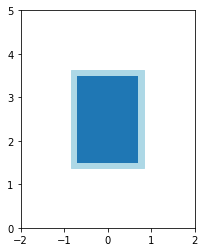

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

"""matplotlib.pyplot is a collection of command shell style functions that make matplotlib 
work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, 
creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
Pyplot maintains state across calls."""

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

platewidthInFeet = 17 / 12 # plate is 17 inches wide
expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
szHeightInFeet = 3.5 - 1.5
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

# draw expanded zone: 3 inch ball (.25 ft) = 1.5 inches all the way around
ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, 1.5 - halfBallInFeet), expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))

# draw formal zone (plate only)
ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, 1.5), platewidthInFeet, szHeightInFeet))

plt.ylim(0, 5)
plt.xlim(-2, 2)

### Kershaw Called Balls and Strikes (4 plots)

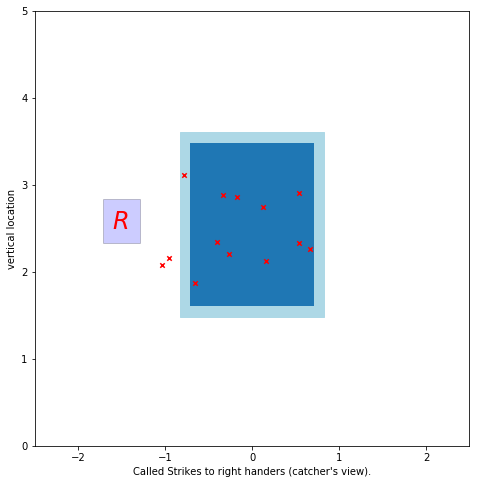

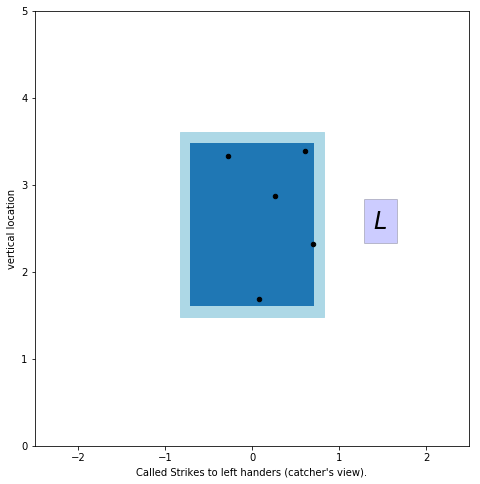

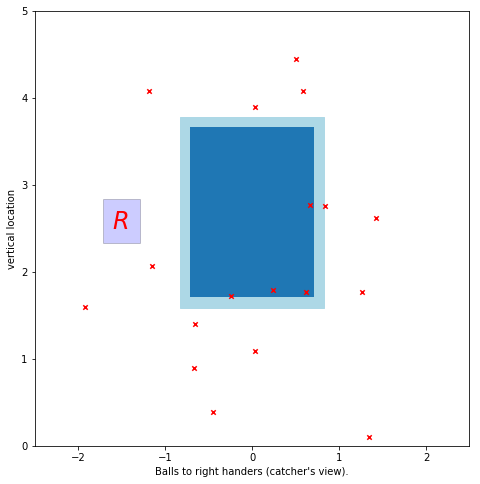

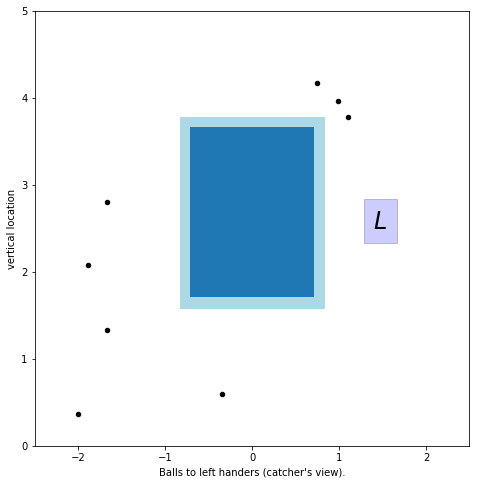

In [225]:
pitchCalls = ['Called Strike', 'Ball']
sides = ['R', 'L']
colors = {'R':'red', 'L':'black'} 
markers = {'R':'x', 'L':'o'}

for pitchCall in pitchCalls:
    for sidename in sides: 
        df = pitchDF.loc[pitchDF['des']==pitchCall].loc[pitchDF['frame']=='top']
        mark = markers[sidename]
        colr = colors[sidename]
        #print("Group:" + sidename )
        df_side = df.loc[pitchDF['stand']==sidename] 
        ax1 = df_side.plot(kind='scatter', x='px', y='pz', marker=mark, color=colr, figsize=[8,8], ylim=[0,4], xlim=[-2,2])

        if sidename == 'R':
            xcoord = -1.6
            handers = "right handers"
        else: 
            xcoord = 1.4
            handers = "left handers"
        txtbatter = ax1.text(xcoord, 2.5, sidename, style='italic', fontsize=24, color=colr,
                bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

        ax1.set_xlabel(pitchCall + "s to " + handers + " (catcher's view).")
        ax1.set_ylabel('vertical location')
        ax1.set_aspect(aspect=1)

        platewidthInFeet = 17 / 12 # plate is 17 inches wide
        expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
        szTop = df["szTop"].iloc[0]
        szBottom = df["szBottom"].iloc[0]
        szHeightInFeet = szTop - szBottom
        ballInFeet = 3 / 12
        halfBallInFeet = ballInFeet / 2
        # draw expanded zone
        outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - halfBallInFeet), 
                                                  expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))
        # draw formal zone
        rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
        outrect.zorder=-2 
        rect.zorder=-1 
        
        plt.ylim(0, 5)
        plt.xlim(-2.5, 2.5)


### Dickerson AtBat #1

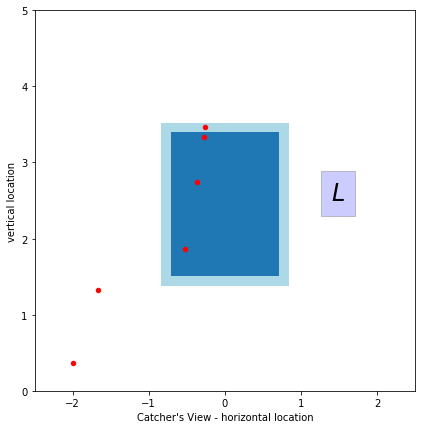

In [87]:
df = pitchDF.loc[pitchDF['ab']=='1'] # first atbat of the game

ax1 = df.plot(kind='scatter', x='px', y='pz', color='red', figsize=[7,7], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel("Catcher's View - horizontal location")
ax1.set_ylabel('vertical location')
ax1.set_aspect(aspect=1)

platewidthInFeet = 17 / 12 # plate is 17 inches wide
expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2
# draw expanded zone
outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - halfBallInFeet), 
                                          expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))
# draw formal zone
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))

outrect.zorder=-2 
rect.zorder=-1 
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)

stand = df['stand'].iloc[0]
if  stand == 'R':
    standTextX = -1.5
else:
    standTextX = 1.4
tbatter = ax1.text(standTextX, 2.5, stand, style='italic', fontsize=24,
        bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})


### Label pitches

1 4-seam fb -0.52 1.86
2 4-seam fb -0.37 2.75
3 4-seam fb -1.67 1.33
4 slider -2.0 0.36
5 4-seam fb -0.26 3.47
6 slider -0.28 3.33


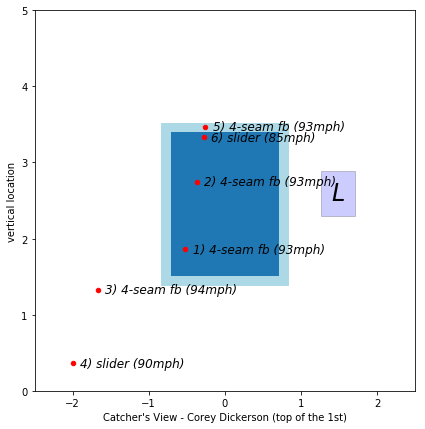

In [34]:
df = pitchDF.loc[pitchDF['ab']=='1']
#print(df)
stand = df['stand'].iloc[0]
batter = df['batter'].iloc[0]
inning = df['inning'].iloc[0]
frame = df["frame"].iloc[0]
suffix = "th"
suffix = "st" if inning == '1' else suffix
suffix = "nd" if inning == '2' else suffix
suffix = "rd" if inning == '3' else suffix

#print("Batter:" + batter)
ax1 = df.plot(kind='scatter', x='px', y='pz', color='red', figsize=[7,7], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel("Catcher's View - " + batter + " (" + frame + " of the " + inning + suffix + ")")
ax1.set_ylabel('vertical location')
ax1.set_aspect(aspect=1)
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)

platewidthInFeet = 17 / 12 # plate is 17 inches wide
expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
# draw expanded zone: 3 inch ball (.25 ft) = 1.5 inches all the way around
outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - 0.125), expandedPlateInFeet, szHeightInFeet + 0.25, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 

if stand == 'R':
    standTextX = -1.5
else:
    standTextX = 1.4
tbatter = ax1.text(standTextX, 2.5, stand, style='italic', fontsize=24,
        bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

#label pitch points
ptypes = df["pitchtype"]
xcoords = df["px"]
ycoords = df["pz"]
speed = df["speed"]
abIdx = df["abIdx"]

for i, txt in enumerate(ptypes):
    print(abIdx.iloc[i], txt, xcoords.iloc[i], ycoords.iloc[i])
    txtDetail = str(abIdx.iloc[i]) + ") " + txt +  " (" + str(int(speed.iloc[i])) + "mph)"
    txt = ax1.text(xcoords.iloc[i]+.1, ycoords.iloc[i]-.05, txtDetail, style='italic', fontsize=12)

[69, 69, 72, 60, 69, 45] ['red', 'red', 'red', 'white', 'red', 'white'] ['4-seam fb' 'slider']
1 4-seam fb -0.52 1.86
2 4-seam fb -0.37 2.75
3 4-seam fb -1.67 1.33
4 slider -2.0 0.36
5 4-seam fb -0.26 3.47
6 slider -0.28 3.33


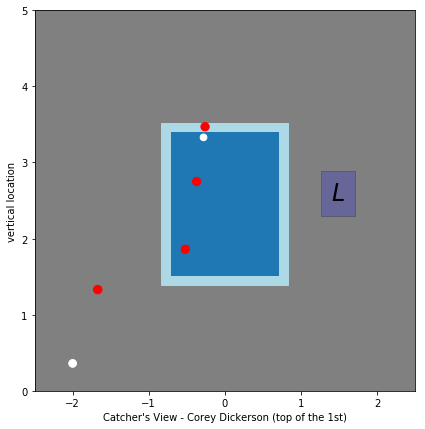

In [37]:
pitchColors = { "FA":"b", "FF":"red", "FT": "y", "FC": "k", "":"w", None: "violet",
                    "FS":"aqua", "SL":"white", "CH":"h","CU":"gold","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }
df = pitchDF.loc[pitchDF['ab']=='1']
#print(df)
stand = df['stand'].iloc[0]
batter = df['batter'].iloc[0]
inning = df['inning'].iloc[0]
frame = df["frame"].iloc[0]
suffix = "th"
suffix = "st" if inning == '1' else suffix
suffix = "nd" if inning == '2' else suffix
suffix = "rd" if inning == '3' else suffix

availColors = ['b','r','y','k','w']
pitchesUsed = df['pitchtype'].unique()
abCount = len(df['speed'])
markerSize = [0] * abCount
colors = ['b'] * abCount
for i, sx in enumerate(df['speed']):
    markerSize[i] = int(sx -  70)*3
    thrownPitch = df['pitchtype'][i]
    for j, (k, v) in enumerate(pitchDictionary.items()):
        #print("j: {} pitchtype: {} index: {}, key: {}, value: {}".format(j, thrownPitch, i, k, v))
        if thrownPitch == v:
            colors[i] = pitchColors[k]
            
print(markerSize, colors, pitchesUsed)

#groups = df.groupby('pitchtype')
#for i, (name, group) in enumerate(groups):
#    group.plot(kind='scatter', x='px', y='pz', ylim=((0,4)), xlim=((0,4)),  label=name, ax=ax, color=colors[i])

ax1 = df.plot(kind='scatter', x='px', y='pz',  color=colors, s=markerSize, marker="o", figsize=[7,7], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel("Catcher's View - " + batter + " (" + frame + " of the " + inning + suffix + ")")
ax1.set_ylabel('vertical location')
ax1.set_aspect(aspect=1)
ax1.patch.set_facecolor("grey")
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)

platewidthInFeet = 17 / 12 # plate is 17 inches wide
expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
# draw expanded zone: 3 inch ball (.25 ft) = 1.5 inches all the way around
outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - 0.125), expandedPlateInFeet, szHeightInFeet + 0.25, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 

if stand == 'R':
    standTextX = -1.5
else:
    standTextX = 1.4
tbatter = ax1.text(standTextX, 2.5, stand, style='italic', fontsize=24,
        bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

#label pitch points
ptypes = df["pitchtype"]
xcoords = df["px"]
ycoords = df["pz"]
speed = df["speed"]
abIdx = df["abIdx"]

for i, txt in enumerate(ptypes):
    print(abIdx.iloc[i], txt, xcoords.iloc[i], ycoords.iloc[i])


[69, 69, 72, 60, 69, 45] {'R': 'red', 'L': 'black'} ['4-seam fb' 'slider']


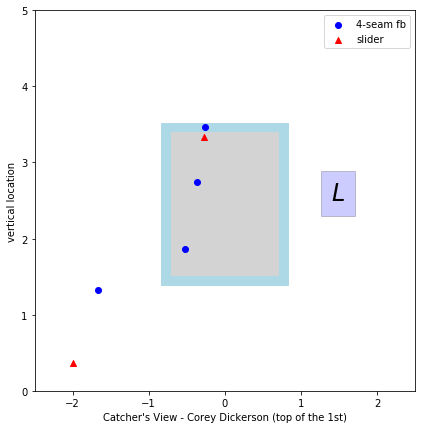

In [85]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from numpy.random import random

df = pitchDF.loc[pitchDF['ab']=='1']

pitchColors = { "FA":"b", "FF":"b", "FT": "y", "FC": "k", "":"w", None: "violet",
                    "FS":"aqua", "SL":"red", "CH":"h","CU":"gold","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }
pitchMarkers = { "FA":"x", "FF":"o", "FT": "1", "FC": "2", "":"2", None: "4",
                    "FS":"aqua", "SL":"^", "CH":"h","CU":"gold","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }

# define the dataframe slice (one at bat)

stand = df['stand'].iloc[0]
batter = df['batter'].iloc[0]
inning = df['inning'].iloc[0]
frame = df["frame"].iloc[0]
suffix = "th"
suffix = "st" if inning == '1' else suffix
suffix = "nd" if inning == '2' else suffix
suffix = "rd" if inning == '3' else suffix

plt.figure(figsize=(7,7)) 

platewidthInFeet = 17 / 12 # plate is 17 inches wide
expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
# draw expanded zone: 3 inch ball (.25 ft) = 1.5 inches all the way around

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((expandedPlateInFeet/-2, szBottom - 0.125), expandedPlateInFeet, szHeightInFeet + 0.25, color='lightblue'))
currentAxis.add_patch(Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet, facecolor="lightgrey"))
if stand == 'R':
    standTextX = -1.5
else:
    standTextX = 1.4
tbatter = currentAxis.text(standTextX, 2.5, stand, style='italic', fontsize=24,
        bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

pitchList = []
availColors = ['b','r','y','k','w']
pitchesUsed = df['pitchtype'].unique()
abCount = len(df['speed'])
markerSize = [0] * abCount
for i, sx in enumerate(df['speed'].tolist()):
    markerSize[i] = int(sx -  70)*3
    thrownPitch = df['pitchtype'].tolist()[i]
    for j, (k, v) in enumerate(pitchDictionary.items()):
        if thrownPitch == v:
            pitchList.append(plt.scatter(df['px'].iloc[i], df['pz'].iloc[i], marker=pitchMarkers[k], 
                                         color=pitchColors[k], label=v, zorder=2))
            #print("i: {} j: {} pitch: {}, key: {}, value: {} marker: {} color:{}".format(i, j, thrownPitch, k, v, pitchMarkers[k], pitchColors[k]))
            
print(markerSize, colors, pitchesUsed)

# graph limits
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.gca().set_aspect('equal', 'box')

# draw legend by consolidating like pitch types
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)

# axis labels
plt.xlabel("Catcher's View - " + batter + " (" + frame + " of the " + inning + suffix + ")")
plt.ylabel('vertical location')

plt.show()

## Add Ball-Strike count to dataframe

In [226]:
uniqDesList = pitchDF.des.unique()
print(uniqDesList)
# Declare a list that is to be converted into a column 
ballColList = [] 
strikeColList = []
ballCount = 0
strikeCount = 0

for index, row in pitchDF.iterrows():
    des = row['des']
    if row['abIdx'] == 1: # first pitch in ab
        ballCount = 0
        strikeCount = 0
        
    # save count before this pitch was thrown, then update count
    ballColList.append(ballCount)
    strikeColList.append(strikeCount)
    #print(index, row['ab'], row['abIdx'], row['des'], ballCount, strikeCount)
    
    if 'Ball' in des:
        ballCount = ballCount + 1
    elif 'Foul' in des:
        if strikeCount is not 2:
            strikeCount = strikeCount + 1
    elif 'Strike' in des:
        strikeCount = strikeCount + 1
    
# print(ballColList, strikeColList)
pitchDF['ballCount'] = ballColList # equate column to list
pitchDF['strikeCount'] = strikeColList # equate column to list


['Foul' 'Swinging Strike' 'Ball' 'Called Strike' 'In play, out(s)'
 'Ball In Dirt' 'In play, run(s)' 'Swinging Strike (Blocked)' 'Foul Tip'
 'In play, no out']


In [227]:
pitchDF.head(25)
#pitchDF.info()

,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des,ballCount,strikeCount
idx,,,,,,,,,,,,,,,,
1,1,1,top,1,1,Corey Dickerson,L,93.3,4-seam fb,-0.52,1.86,3.40,1.51,Foul,0,0
2,2,1,top,1,2,Corey Dickerson,L,93.3,4-seam fb,-0.37,2.75,3.40,1.51,Swinging Strike,0,1
3,3,1,top,1,3,Corey Dickerson,L,94.6,4-seam fb,-1.67,1.33,3.66,1.71,Ball,0,2
4,4,1,top,1,4,Corey Dickerson,L,90.5,slider,-2.00,0.36,3.53,1.58,Ball,1,2
5,5,1,top,1,5,Corey Dickerson,L,93.8,4-seam fb,-0.26,3.47,3.40,1.51,Foul,2,2
6,6,1,top,1,6,Corey Dickerson,L,85.0,slider,-0.28,3.33,3.48,1.61,Called Strike,2,2
7,7,1,top,2,1,Brandon Barnes,R,93.4,4-seam fb,0.05,2.59,3.53,1.60,"In play, out(s)",0,0
8,8,1,top,3,1,Troy Tulowitzki,R,94.4,4-seam fb,0.03,1.09,3.64,1.59,Ball,0,0
9,9,1,top,3,2,Troy Tulowitzki,R,88.0,slider,-1.39,0.61,3.58,1.71,Swinging Strike,1,0


## Show Kershaw pitch tendency by count

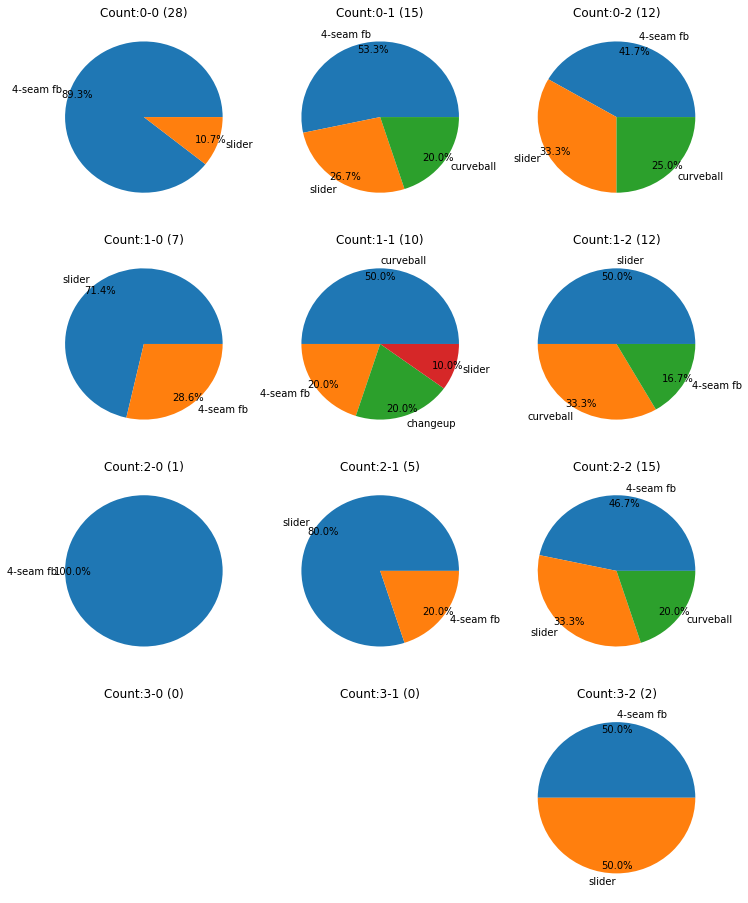

In [229]:
titleList = []
dataList = []
fig, axes = plt.subplots(4, 3, figsize=(12,16))

for b in range(4):
    for s in range(3):
        #print("Count:",str(b),str(s))
        df = pitchDF.loc[(pitchDF['ballCount']==b) & (pitchDF['strikeCount']==s) & (pitchDF['frame']=='top')]
        title = "Count:" + str(b) + "-" + str(s) + " (" + str(len(df)) + ")"
        titleList.append(title)
        dataList.append(df)
        #if df.size > 0:  #empty - no count encountered
       
for i, ax in enumerate(axes.flatten()):
    x = dataList[i].pitchtype.value_counts() 
    l = dataList[i].pitchtype.unique()
    #print(x)
    ax.pie(x, radius = 1, autopct="%.1f%%", pctdistance=0.9, labels=l)
    ax.set_title(titleList[i])

plt.show()

In [143]:
df.head()

,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des,ballCount,strikeCount
idx,,,,,,,,,,,,,,,,
56,56,2,top,12,7,Josh Rutledge,R,93.1,4-seam fb,-0.84,3.12,3.46,1.57,Foul,3,2
57,57,2,top,12,8,Josh Rutledge,R,88.2,slider,0.46,2.18,3.46,1.57,"In play, out(s)",3,2


PitchCount:3-2


Text(0.5,1,'PitchCount:3-2')

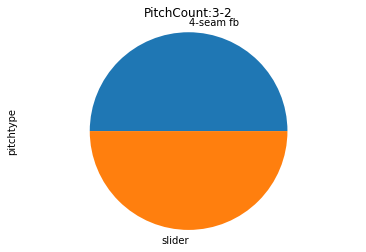

In [148]:
import matplotlib.pyplot as plt

title = "PitchCount:" + str(df['ballCount'].iloc[0]) + "-" + str(df['strikeCount'].iloc[0])
print(title)
 
df.pitchtype.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title(title)

IndexError: list index out of range

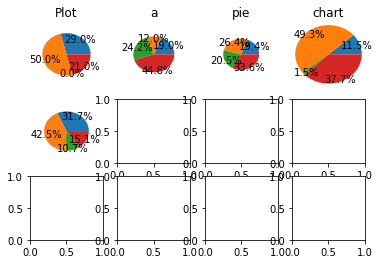